<a href="https://colab.research.google.com/github/f-lrz/BairesDev_Files/blob/main/Desafio_C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 594.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00


In [7]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [8]:
tf.__version__

'2.19.0'

In [9]:
%load_ext tensorboard

In [10]:
logdir='log'

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.8870 - loss: 0.3488 - val_accuracy: 0.9853 - val_loss: 0.0477
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9848 - loss: 0.0488 - val_accuracy: 0.9889 - val_loss: 0.0337
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.9885 - val_loss: 0.0384
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9899 - val_loss: 0.0297
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9916 - val_loss: 0.0282


In [17]:
y_true=test_labels
y_pred_probabilities = model.predict(test_images)
y_pred = np.argmax(y_pred_probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [18]:
classes=[0,1,2,3,4,5,6,7,8,9]

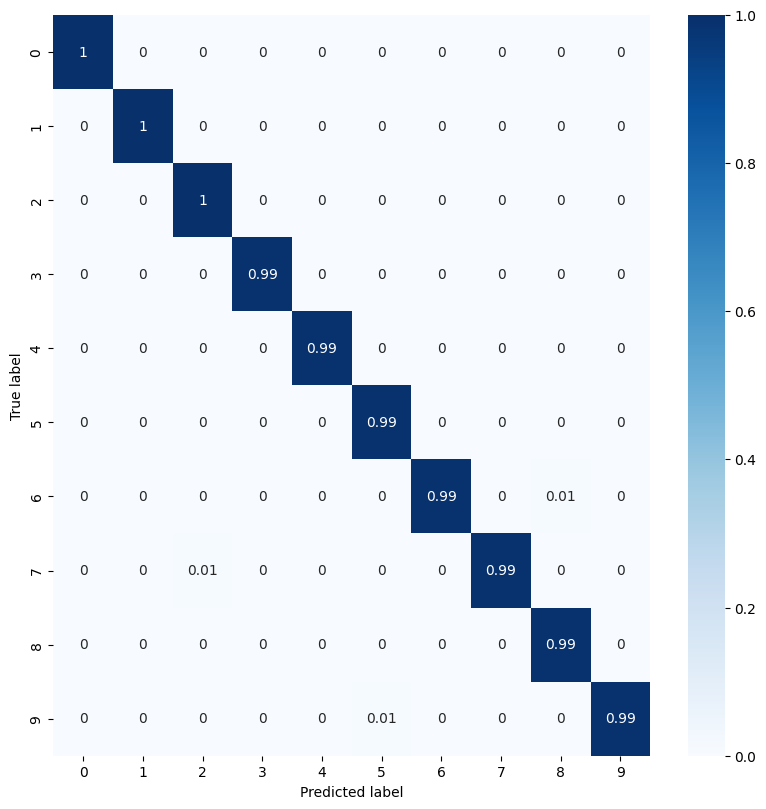

In [19]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
sensi = np.diag(con_mat) / np.sum(con_mat, axis=1)

for i, sens in enumerate(sensi):
  print(f"Sensibilidade para a classe {classes[i]}: {sens:.4f}")

Sensibilidade para a classe 0: 0.9990
Sensibilidade para a classe 1: 0.9991
Sensibilidade para a classe 2: 0.9961
Sensibilidade para a classe 3: 0.9891
Sensibilidade para a classe 4: 0.9939
Sensibilidade para a classe 5: 0.9910
Sensibilidade para a classe 6: 0.9854
Sensibilidade para a classe 7: 0.9874
Sensibilidade para a classe 8: 0.9887
Sensibilidade para a classe 9: 0.9851


In [44]:
instancias_totais = np.sum(con_mat)

espec = []
for i in range(len(classes)):
    tn = instancias_totais - np.sum(con_mat[i, :]) - np.sum(con_mat[:, i]) + con_mat[i, i]

    fp = np.sum(con_mat[:, i]) - con_mat[i, i]

    if (tn + fp) == 0:
        valor_espec = 0
    else:
        valor_espec = tn / (tn + fp)
    espec.append(valor_espec)

for i, espec in enumerate(espec):
    print(f"Especificidade para a classe {classes[i]}: {espec:.4f}")

Especificidade para a classe 0: 0.9987
Especificidade para a classe 1: 0.9991
Especificidade para a classe 2: 0.9986
Especificidade para a classe 3: 0.9996
Especificidade para a classe 4: 0.9994
Especificidade para a classe 5: 0.9987
Especificidade para a classe 6: 0.9997
Especificidade para a classe 7: 0.9991
Especificidade para a classe 8: 0.9988
Especificidade para a classe 9: 0.9991


In [45]:
acuracia = np.sum(np.diag(con_mat)) / np.sum(con_mat)
print(f"Acurácia geral: {acuracia:.4f}")

Acurácia geral: 0.9916


In [46]:
precisao = []

for i in range(len(classes)):
    vp = con_mat[i, i]

    fp = np.sum(con_mat[:, i]) - vp

    fn = np.sum(con_mat[i, :]) - vp

    if (vp + fp) == 0:
        valor_precisao = 0
    else:
        valor_precisao = vp / (vp + fp)
    precisao.append(valor_precisao)

for i in range(len(classes)):
      print(f"Precisão para cada classe {classes[i]}: {precisao[i]:.4}")

Precisão para cada classe 0: 0.9879
Precisão para cada classe 1: 0.993
Precisão para cada classe 2: 0.9875
Precisão para cada classe 3: 0.996
Precisão para cada classe 4: 0.9949
Precisão para cada classe 5: 0.9866
Precisão para cada classe 6: 0.9968
Precisão para cada classe 7: 0.9922
Precisão para cada classe 8: 0.9887
Precisão para cada classe 9: 0.992


In [47]:
f_score = []

for i in range(len(classes)):
    valor_sensi = sensi[i]

    if (valor_precisao + valor_sensi) == 0:
        valor_f_score = 0
    else:
        valor_f_score = 2 * (valor_precisao * valor_sensi) / (valor_precisao + valor_sensi)
    f_score.append(valor_f_score)

for i in range(len(classes)):
    print(f"F-score para cada classe {classes[i]}: {f_score[i]:.4f}")

F-score para cada classe 0: 0.9955
F-score para cada classe 1: 0.9956
F-score para cada classe 2: 0.9941
F-score para cada classe 3: 0.9906
F-score para cada classe 4: 0.9930
F-score para cada classe 5: 0.9915
F-score para cada classe 6: 0.9887
F-score para cada classe 7: 0.9897
F-score para cada classe 8: 0.9904
F-score para cada classe 9: 0.9886
